In [1]:
#Import
#from pandas import Series, DataFrame
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Created the DataFrame Object with gold historical data
#Creo l'oggetto DataFrame con i dati dell'andamento storico del prezzo dell'oro
dfAUX = pd.read_csv('WGC-GOLD_DAILY_USD.csv', index_col = 'Date')
dfAUX.tail()

,Value
Date,
1971-01-01,37.4
1970-10-01,36.2
1970-07-01,35.4
1970-04-01,35.1
1970-01-01,35.2


In [3]:
# Created the DataFrame Object with bitcoin historical data
#Creo l'oggetto DataFrame con i dati dell'andamento storico del prezzo dei bitcoin
dfBTC = pd.read_csv('BTC-USD.csv', index_col = 'Date')
dfBTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,0.04951,0
2010-07-18,0.04951,0.08585,0.05941,0.08584,0.08584,5
2010-07-19,0.08584,0.09307,0.07723,0.08080,0.08080,49
2010-07-20,0.08080,0.08181,0.07426,0.07474,0.07474,20
2010-07-21,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [4]:
# merge function is analogue to a 'Join' on SQL, the parameter is the key of the join
# merge funzione analoga ad una 'Join' SQL, nel parametro on c'è la chiave del Join
dfMerged = pd.merge(dfBTC, dfAUX, on='Date')
dfMerged.head()

,Open,High,Low,Close,Adj Close,Volume,Value
Date,,,,,,,
2010-07-19,0.08584,0.09307,0.07723,0.08080,0.08080,49,1181.0
2010-07-20,0.08080,0.08181,0.07426,0.07474,0.07474,20,1183.0
2010-07-21,0.07474,0.07921,0.06634,0.07921,0.07921,42,1191.5
2010-07-22,0.07921,0.08181,0.05050,0.05050,0.05050,129,1199.5
2010-07-23,0.05050,0.06767,0.05050,0.06262,0.06262,141,1190.5


In [5]:
# Columns selection
# Seleziono le colonne di interesse
dfSelectedRow = dfMerged[['Close', 'Value']]
dfSelectedRow.tail(10)

,Close,Value
Date,,
2019-07-29,9506.929688,1419.05
2019-07-30,9595.519531,1425.90
2019-07-31,10089.250000,1427.55
2019-08-01,10409.790039,1406.80
2019-08-02,10528.990234,1441.75
2019-08-05,11807.959961,1465.25
2019-08-06,11467.099609,1465.25
2019-08-07,11974.280273,1506.05
2019-08-08,11982.799805,1495.75


In [6]:
# Rename the columns
# Rinomino le colonne
dfSelectedRow.columns = ['BTC', 'AUX']
dfSelectedRow.tail()

,BTC,AUX
Date,,
2019-08-05,11807.959961,1465.25
2019-08-06,11467.099609,1465.25
2019-08-07,11974.280273,1506.05
2019-08-08,11982.799805,1495.75
2019-08-09,11865.589844,1497.70


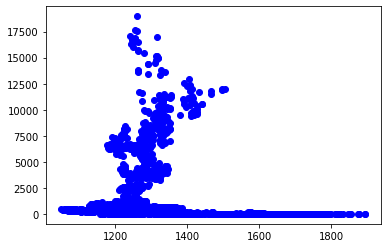

In [7]:
# Graphics

plt.plot(dfSelectedRow.AUX, dfSelectedRow.BTC, 'bo')


#df_no_index = dfSelectedRow.reset_index()
#plt.plot(df_no_index['Date'], df_no_index['BTC'], color='blue', linewidth=3)
#plt.plot(df_no_index['Date'], df_no_index['AUX'], color='green', linewidth=3)

plt.savefig("BTC_AUX.png")

In [8]:
# calculate the correlation
# calcolo della correlazione tra i valori BTC e AUX con 'corr'
dfSelectedRow.BTC.corr(dfSelectedRow.AUX)

-0.20010645311894856

In [9]:
# calculate the covariance
# calcolo della covarianza tra i valori BTC e AUX con 'cov'
dfSelectedRow.BTC.cov(dfSelectedRow.AUX)

-115435.59932731636

In [10]:
# Select the values of the 2019 and put it on a DataFrame
# Per selezionare i valori compresi tra due date e inserirli nel rispettivo dataframe
df2019 = dfSelectedRow.loc['2019-01-01': '2019-12-31']
df2019.head()

,BTC,AUX
Date,,
2019-01-01,3880.149902,1279.00
2019-01-02,3961.010010,1282.90
2019-01-03,3835.860107,1290.45
2019-01-04,3874.060059,1279.90
2019-01-07,4050.399902,1292.20


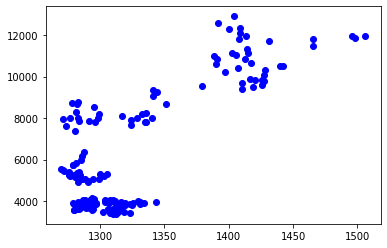

In [11]:
# Graphics 2019

plt.plot(df2019.AUX, df2019.BTC, 'bo')


#df2019_no_index = df2019.reset_index()
#plt.plot(df2019_no_index['Date'], df2019_no_index['BTC'], color='blue', linewidth=3)
#plt.plot(df2019_no_index['Date'], df2019_no_index['AUX'], color='green', linewidth=3)

plt.savefig("BTC_AUX_2019.png")

In [12]:
# calculate the correlation of the 2019 values
## Calcolo della correlazione tra gli andamenti dei due valori relativi all'anno 2019
df2019.BTC.corr(df2019.AUX)

0.7819712184922009